# Análise exploratória de dados

In [2]:
pip list | grep matplotlib

matplotlib                3.5.1
matplotlib-inline         0.1.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "numpy<2.0"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#0d7d6d", "#fff0d5", "#ffc19e", "#ffc19e"] 
# verde-água; bege; laranja e azul escuro, nessa ordem.
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#importando conjunto de dados:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Descrição dos Dados


O conjunto de dados Titanic relaciona as informações dos passageiros a bordo do famoso navio, naufragado em 1909. A observação desse dataset permite identificar padrões ao analisar quais fatores mais impactaram as taxas de sobrevivência, levando a insights sobre segurança em embarcações como essa.  

Variáveis: 15 variáveis sendo 10 qualitativas e 5 quantitativas.


In [7]:
# Dicionários de Dados:
dicionario = pd.DataFrame  ( [
    
    {
        "variavel": "survived",
        "descrição": "Se a pessoa sobreviveu ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "pclass",
        "descrição": "CLasse da passagem (1,2,3)",
        "tipo": "qualitativo",
        "subtipo": "ordinal",
    }, {
        "variavel": "sex",
        "descrição": "Gênero do passageiro",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "age",
        "descrição": "Idade do passageiro",
        "tipo": "quantitativo",
        "subtipo": "contínua",
    }, {
        "variavel": "sibsp",
        "descrição": "Se o passageiro possui irmãos/cônjuges a bordo",
        "tipo": "quantitativo",
        "subtipo": "discreto",
    }, {
        "variavel": "parch",
        "descrição": "Se o passageiro possui pais/filhos a bordo",
        "tipo": "quantitativo",
        "subtipo": "discreto",
    }, {
        "variavel": "fare",
        "descrição": "Valor da passagem",
        "tipo": "quantitativo",
        "subtipo": "contínuo",
    }, {
        "variavel": "embarked",
        "descrição": "Porto de embarque (C, Q, S)",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "class",
        "descrição": "Classe do passageiro (1,2,3)",
        "tipo": "qualitativo",
        "subtipo": "ordinal",
    }, {
        "variavel": "who",
        "descrição": "Perfil do passageiro",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "adult_male",
        "descrição": "Se é um homem adulto",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "deck",
        "descrição": "Qual cabine o passageiro está hospedado",
        "tipo": "quantitativo",
        "subtipo": "discreto",
    }, {
        "variavel": "embark_town",
        "descrição": "Cidade de embarque",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "alive",
        "descrição": "Se a pessoa sobreviveu ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "alone",
        "descrição": "Se a pessoa está só ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    } 


] )

In [8]:
dicionario.to_csv("../data/external/dictionary.csv", index=False)

In [9]:
dicionario

,variavel,descrição,tipo,subtipo
0,survived,Se a pessoa sobreviveu ou não,qualitativo,nominal
1,pclass,"CLasse da passagem (1,2,3)",qualitativo,ordinal
2,sex,Gênero do passageiro,qualitativo,nominal
3,age,Idade do passageiro,quantitativo,contínua
4,sibsp,Se o passageiro possui irmãos/cônjuges a bordo,quantitativo,discreto
5,parch,Se o passageiro possui pais/filhos a bordo,quantitativo,discreto
6,fare,Valor da passagem,quantitativo,contínuo
7,embarked,"Porto de embarque (C, Q, S)",qualitativo,nominal
8,class,"Classe do passageiro (1,2,3)",qualitativo,ordinal
9,who,Perfil do passageiro,qualitativo,nominal


In [10]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Em 891 linhas, temos:

Valores faltantes: 688 em 'deck' e 177 em 'age'.

Das 5 variáveis quantitativas 3 são discretas e 2 nominal.
Das 10 variáves qualitativas 8 são nominais e 2 ordinais.

## 2. Perguntas de partida e hipóteses

Ao observar brevemente podemos levantar algumas perguntas de partida como:

- Qual a passagem mais cara? E a mais barata?
- Existe uma relação entre a classe da passagem e a sobrevivência dos passsageiros?
- Os passageiros viajando sozinho tiveram maior taxa de sobrevivência?
- Qual cidade pagou mais barato no ticket de viagem?
- Quais fatores influenciaram o valor da passagem?



In [13]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
))

df.dropna(inplace=True)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

NameError: name 'Markdown' is not defined

Assim podemos obervar que temos um total de 869 dados faltantes, principalmente na variável deck, tornando pouco precisas as análises em volta desse parêmetro.

In [14]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

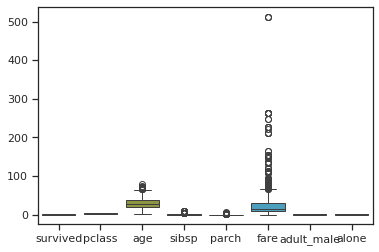

In [12]:
# Para identificar informações das var quantitativas, utilizamos o boxplot
sns.boxplot(df)

In [ ]:
# relacionando idade e valor da passagem
sns.scatterplot(
    data=df,
    x='age',
    y='fare',
    alpha=0.5,
    color=colors[0]  
)

In [ ]:
df['sex'].hist();

In [ ]:
# Relação entre sobreviventes e classe
surv_class = df.groupby('pclass')['survived'].value_counts(normalize=True).unstack()

## 3. Insights

Já que existem muitos dados faltantes em relação a 'age' e 'deck', hipóteses se baseando nesses parâmetros se tornam pouco eficazes.

Ao analisarmos os dados no DataFrame podemos perceber uma relação entre o preço da passagem ('fare'), classe do passageiro, cidade de origem e gênero (os homens pagam mais)
